Keiana Dunn
Voting records - Party Prediction
Neural Network for Binary Classification Predictive Modeling

# Import library

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Used to encode labels with value between 0 and 1. 
from sklearn.metrics import classification_report, confusion_matrix 
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(7)# split into input (X) and output (Y) variables using 16 inputs

Using TensorFlow backend.
/home/ktd2001/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ktd2001/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ktd2001/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ktd2001/anaconda3/lib/python3.7/site-packages/t

# Load data

In [2]:
#read in file that consist of strings of text
dataset = pd.read_csv("votingrecords.csv", header = None)

#show data
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
3,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
4,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [3]:
# LabelEncoder used to assigning labels categorical, fit used to encode on to labels, and Transform label used to normalized encoding
dataset1 = dataset.apply(LabelEncoder().fit_transform) 

# Convert dataframe into a numpy array
dataset2 = dataset1.values

print(dataset2)

# Shows # of observations and variables 
print(dataset2.shape) 

[[0 0 1 ... 1 1 1]
 [1 0 1 ... 1 0 1]
 [0 1 1 ... 0 1 1]
 ...
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]]
(232, 17)


In [4]:
# split into input (X) and output (Y) variables
# democrat = 0, republican = 1                                         
X = dataset2[:,1:17]
Y = dataset2[:,0]

# Create model architecture

In [5]:
# Create sequential model 
model = Sequential()
# Create Multilayer Perceptron with binary classes and activation functions
model.add(Dense(12, input_dim=16,activation='relu')) #16 neurons using relu activation function
model.add(Dense(8, activation='relu')) # 8 neurons using relu activation function
model.add(Dense(1, activation='sigmoid')) #Single neuron used to produce a probability output in range of 0 to 1 

Instructions for updating:
Colocations handled automatically by placer.


# Compile network optimizer, loss function, and metrics to train the model

In [6]:
# Learning Rate 
adam_50 = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#Compile model using loss function, optimizer and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model by training neural network

In [7]:
# Fit the model 
history = model.fit(X,Y,epochs=50,batch_size=10, verbose=0)

Instructions for updating:
Use tf.cast instead.


# Evaluate efficiency and performance of the model now that NN is built

In [8]:
# Evaluates the model efficiency and performance
scores_50 = model.evaluate(X, Y)   # Evaluation of the loss function for a given inputs
y_predict_50 = model.predict(X)    # Prediction results
print(scores_50)
print(y_predict_50)

232/232 [==============================] - 0s 291us/step
[0.18304921840799265, 0.982758641242981]
[[2.47165561e-03]
 [7.15898752e-01]
 [5.95748425e-05]
 [1.03616714e-03]
 [3.14423442e-03]
 [8.22544098e-05]
 [5.95748425e-05]
 [7.15898752e-01]
 [5.95748425e-05]
 [7.15898752e-01]
 [3.63349915e-04]
 [7.15898752e-01]
 [1.03616714e-03]
 [7.15898752e-01]
 [7.15898752e-01]
 [7.15898752e-01]
 [3.77893448e-05]
 [3.94007564e-03]
 [1.25488639e-03]
 [2.49585509e-03]
 [5.41826785e-02]
 [5.95748425e-05]
 [7.15898752e-01]
 [7.15898752e-01]
 [7.15898752e-01]
 [7.15898752e-01]
 [7.15898752e-01]
 [7.15898752e-01]
 [1.65700912e-04]
 [7.15898752e-01]
 [7.15898752e-01]
 [7.15898752e-01]
 [1.03616714e-03]
 [6.01816297e-01]
 [7.15898752e-01]
 [5.32269478e-04]
 [4.78145152e-01]
 [1.04880363e-01]
 [1.05392933e-03]
 [7.15898752e-01]
 [7.15898752e-01]
 [7.15898752e-01]
 [2.55945325e-03]
 [7.15898752e-01]
 [7.15898752e-01]
 [1.50549412e-03]
 [3.14423442e-03]
 [2.05546618e-04]
 [5.88119030e-04]
 [8.95285606e-03]
 [

# List all data in history and accuracy rate

In [9]:
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


In [10]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_50[1]*100))


accuracy: 98.28%


In [11]:
print("\n%s: %.2f%%" % (model.metrics_names[0], scores_50[0]*100))


loss: 18.30%


# Create confusion matrix details

In [12]:
# Create confusion matrix details
rounded_50 = [round(i[0]) for i in y_predict_50]
y_pred_50 = np.array(rounded_50,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred_50)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

Confusion Matrix
True negatives:  121
False negatives:  1
False positives:  3
True positives:  107


# Plot accuracy and loss

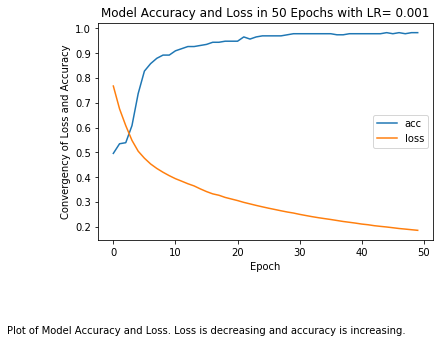

In [13]:
#Plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 50 Epochs with LR= 0.001')
plt.ylabel('Convergency of Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='center right')
plt.text(15,-0.2, 'Plot of Model Accuracy and Loss. Loss is decreasing and accuracy is increasing.', ha='center', va='top')
plt.show()

# Adjust model learning rate and epoch

In [14]:
# Create sequential model 
model = Sequential()
# Create Multilayer Perceptron with binary classes and activation functions
model.add(Dense(12, input_dim=16,activation='relu')) #16 neurons using relu activation function
model.add(Dense(8, activation='relu')) # 8 neurons using relu activation function
model.add(Dense(1, activation='sigmoid')) #Single neuron used to produce a probability output in range of 0 to 1 

# Learning Rate 
adam_100 = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#Compile model using loss function, optimizer and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model 
history = model.fit(X,Y,epochs=100,batch_size=10, verbose=0)

# Evaluates the model efficiency and performance
scores_100 = model.evaluate(X, Y)   # Evaluation of the loss function for a given inputs
Y_predict_100 = model.predict(X)    # Prediction results
print(scores_100)
print(Y_predict_100)

# Accuracy rate
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_100[1]*100))

# Loss rate
print("\n%s: %.2f%%" % (model.metrics_names[0], scores_100[0]*100))

# Create confusion matrix details
rounded_100 = [round(i[0]) for i in Y_predict_100]
Y_predict_100 = np.array(rounded_100,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, Y_predict_100)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 284us/step
[0.03130851109544265, 0.9913793206214905]
[[2.14725733e-04]
 [9.97987628e-01]
 [3.45706940e-06]
 [5.54025173e-05]
 [3.04946303e-03]
 [9.80496407e-06]
 [3.45706940e-06]
 [9.99687791e-01]
 [3.45706940e-06]
 [9.97357488e-01]
 [4.54059243e-03]
 [9.97987628e-01]
 [5.54025173e-05]
 [9.97357488e-01]
 [9.98730063e-01]
 [9.99712110e-01]
 [4.27365303e-05]
 [6.93887472e-04]
 [1.02639198e-04]
 [3.45349312e-04]
 [9.80407000e-03]
 [3.45706940e-06]
 [9.99900103e-01]
 [9.73780930e-01]
 [9.80960011e-01]
 [9.99819577e-01]
 [9.99819577e-01]
 [9.97357488e-01]
 [1.64806843e-05]
 [9.99838352e-01]
 [9.35055256e-01]
 [9.99712110e-01]
 [5.54025173e-05]
 [6.01281703e-01]
 [9.99464989e-01]
 [5.06639481e-06]
 [3.00982982e-01]
 [8.11690688e-02]
 [4.47332859e-04]
 [9.99310672e-01]
 [9.99647141e-01]
 [9.96581912e-01]
 [3.95655632e-04]
 [9.99416590e-01]
 [9.96581912e-01]
 [5.96940517e-05]
 [3.04946303e-03]
 [4.36902046e-05]
 [7.61747360e-05]
 [1.79243088e-03]
 

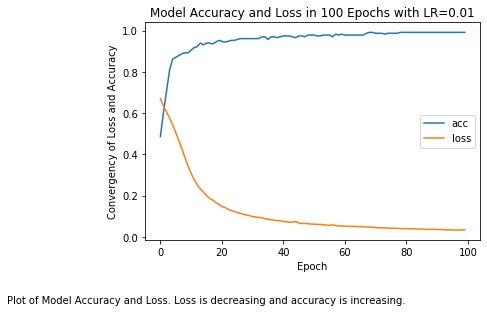

In [15]:
#Plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 100 Epochs with LR=0.01')
plt.ylabel('Convergency of Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='center right')
plt.text(15, -0.28, 'Plot of Model Accuracy and Loss. Loss is decreasing and accuracy is increasing.', ha='center', va='top')
plt.show()

In [16]:
# Create sequential model 
model = Sequential()
# Create Multilayer Perceptron with binary classes and activation functions
model.add(Dense(12, input_dim=16,activation='relu')) #16 neurons using relu activation function
model.add(Dense(8, activation='relu')) # 8 neurons using relu activation function
model.add(Dense(1, activation='sigmoid')) #Single neuron used to produce a probability output in range of 0 to 1 

# Learning Rate 
adam_300 = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#Compile model using loss function, optimizer and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model 
history = model.fit(X,Y,epochs=300,batch_size=10, verbose=0)

# Evaluates the model efficiency and performance
scores_300 = model.evaluate(X, Y) # Evaluation of the loss function for a given inputs
y_predict_300 = model.predict(X)  # Prediction results

# Accuracy rate
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_300[1]*100))

# Loss rate
print("\n%s: %.2f%%" % (model.metrics_names[0], scores_300[0]*100))

# Create confusion matrix details
rounded_300 = [round(i[0]) for i in y_predict_300]
y_pred_300 = np.array(rounded_300,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred_300)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 346us/step

accuracy: 100.00%

loss: 0.27%
Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108


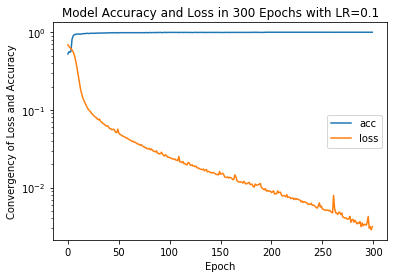

In [17]:
#Plot figure
plt.semilogy(history.history['accuracy'])
plt.semilogy(history.history['loss'])
plt.title('Model Accuracy and Loss in 300 Epochs with LR=0.1')
plt.ylabel('Convergency of Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='center right')
#plt.text(Plot of Model Accuracy and Loss. Loss is decreasing and accuracy is increasing.', ha='center', va='top')
plt.show()

Accuracy is at a steady state at 100% and loss is steady decreasing.

Conclusion:
We were able to improve this neural network model using the Adam optimizer in TensorFlow by fiddling with the learning rate and epoch. The prediction results increased the accuracy and decreased the loss with adjusting the model parameters. 